## Using scikit-learn library (Task 3)

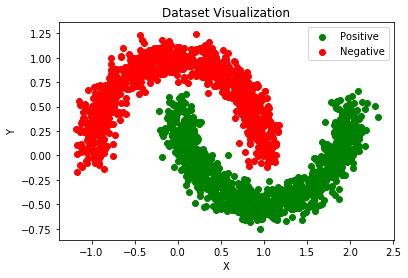

In [9]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#getting dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=2000, noise=0.1)
#splitting dataset into training, validation and testing dataset
X_train = X[:1000]
X_val = X[1001:1500]
X_test=X[1501:]

y_train = y[:1000]
y_val = y[1001:1500]
y_test=y[1501:]

################################################# DATA VISUALIZATION ##########################################################
# Positive Data Points 
x_pos = np.array([X[i] for i in range(len(X)) 
                                    if y[i] == 1]) 
# Negative Data Points 
x_neg = np.array([X[i] for i in range(len(X))  
                                    if y[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'green', label = 'Positive') 
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Visualization')
plt.legend()
plt.show()
################################################ PREPROCESSING DATA ########################################################
#Standardizing and Scaling features 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [22]:
############################################## BUILDING AND TRAINING MODEL #####################################################
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#from sklearn.metrics import accuracy_score
#build the model by calling scikit model function LogisticRegression()
#LogisticRegression:- C is the parameter for regularization, multi_class set to 'ovr' for binary classification
model = LogisticRegression(C=10,multi_class='ovr') 
#train the model
model.fit(X_train, y_train)
#do predictions on Training dataset
predicted_classes = model.predict(X_train)

# Use score method to get accuracy of model
score = model.score(X_train, y_train)
print('Accuracy on Training Dataset:',score*100)
clf_probs = model.predict_proba(X_train)
#using log_loss() function to get cross entropy loss
loss = log_loss(y_train, clf_probs)
print('Loss on Training Dataset:',loss)
############################## Score on Validation dataset #####################################
predicted_classes1 = model.predict(X_val)
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print('Accuracy on Validaton Dataset:',score*100)
clf_probs = model.predict_proba(X_val)
loss = log_loss(y_val, clf_probs)
print('Loss on Validaton Dataset:',loss)
############################## Score on Training dataset #####################################
predicted_classes2 = model.predict(X_test)
# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print('Accuracy on Testing Dataset:',score*100)
clf_probs = model.predict_proba(X_test)
loss = log_loss(y_test, clf_probs)
print('Loss on Testing Dataset:',loss)


Accuracy on Training Dataset: 88.2
Loss on Training Dataset: 0.24431186702465005
Accuracy on Validaton Dataset: 87.5751503006012
Loss on Validaton Dataset: 0.2713308632534962
Accuracy on Testing Dataset: 88.37675350701403
Loss on Testing Dataset: 0.2542708944396038


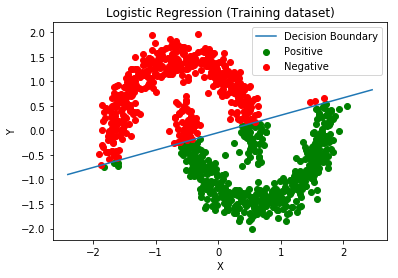

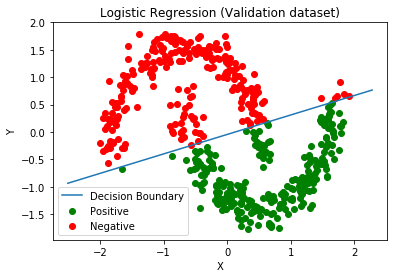

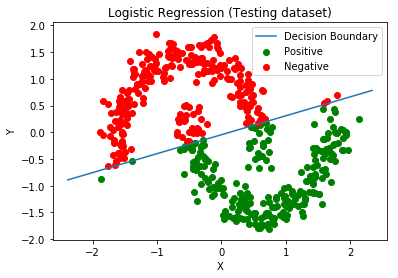

In [18]:
################################### PLOTTING DECISION BOUNDARY ON TRAINING DATASET ###########################################
#get the min and max of training datasets for X axis 
#adding 0.5 to make decision boundary line longer on the plot
x_values = [np.min(X_train[:, 0] - 0.5), np.max(X_train[:, 1] + 0.5)]
#using model weights for Y axis as decision boundary is the sum of weighted inputs 
y_values = - (model.intercept_ + np.dot(model.coef_[0][0], x_values)) / model.coef_[0][1]

#checking for class-1 or class-0
# Positive Data Points (i.e class-1)
x_pos = np.array([X_train[i] for i in range(len(X_train)) 
                                    if predicted_classes[i] == 1]) 
  
# Negative Data Points (i.e class-0)
x_neg = np.array([X_train[i] for i in range(len(X_train))  
                                    if predicted_classes[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'green', label = 'Positive') 
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression (Training dataset)')
plt.legend()
plt.show()

################################### PLOTTING DECISION BOUNDARY ON VALIDATION DATASET ###########################################

x_values = [np.min(X_val[:, 0] - 0.5), np.max(X_val[:, 1] + 0.5)]
y_values = - (model.intercept_ + np.dot(model.coef_[0][0], x_values)) / model.coef_[0][1]

# Positive Data Points 
x_pos = np.array([X_val[i] for i in range(len(X_val)) 
                                    if predicted_classes1[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([X_val[i] for i in range(len(X_val))  
                                    if predicted_classes1[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'green', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression (Validation dataset)')
plt.legend()
plt.show()

##################################### PLOTTING DECISION BOUNDARY ON TESTING DATASET #############################################

x_values = [np.min(X_test[:, 0] - 0.5), np.max(X_test[:, 1] + 0.5)]
y_values = - (model.intercept_ + np.dot(model.coef_[0][0], x_values)) / model.coef_[0][1]

# Positive Data Points 
x_pos = np.array([X_test[i] for i in range(len(X_test)) 
                                    if predicted_classes2[i] == 1]) 
  
# Negative Data Points 
x_neg = np.array([X_test[i] for i in range(len(X_test))  
                                    if predicted_classes2[i] == 0]) 
  
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'green', label = 'Positive') 
  
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression (Testing dataset)')
plt.legend()
plt.show()